In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [229]:
df = pd.DataFrame(pd.read_csv(r"C:\Users\Biwas Kerung\Videos\model\datasets\ARUN.csv"))

In [230]:
df.head()

,S.no,Symbol,Date,Open,High,Low,Close,Vol
0,26,ARUN,2012-01-01.csv,45.0,44.0,43.0,43.0,660
1,20,ARUN,2012-01-02.csv,43.0,42.0,41.0,42.0,"2,300"
2,25,ARUN,2012-01-03.csv,42.0,43.0,43.0,43.0,500
3,23,ARUN,2012-01-04.csv,43.0,44.0,44.0,44.0,440
4,15,ARUN,2012-01-05.csv,44.0,44.0,44.0,44.0,400


In [231]:
df.shape

(458, 8)

In [232]:
df.drop(['Symbol', 'S.no'], axis=1, inplace= True)

In [233]:
df['Date'] = df['Date'].str.replace('.csv','')
# df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-233-13f5fcca5b64>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Date'] = df['Date'].str.replace('.csv','')


In [234]:
df.head()

,Date,Open,High,Low,Close,Vol
0,2012-01-01,45.0,44.0,43.0,43.0,660
1,2012-01-02,43.0,42.0,41.0,42.0,"2,300"
2,2012-01-03,42.0,43.0,43.0,43.0,500
3,2012-01-04,43.0,44.0,44.0,44.0,440
4,2012-01-05,44.0,44.0,44.0,44.0,400


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    458 non-null    object 
 1   Open    458 non-null    float64
 2   High    458 non-null    float64
 3   Low     458 non-null    float64
 4   Close   458 non-null    float64
 5   Vol     458 non-null    object 
dtypes: float64(4), object(2)
memory usage: 21.6+ KB


In [246]:
df_permutated = df.sample(frac=1)

train_size = 0.9541
train_end = int(len(df_permutated)*train_size)

train_pure = df_permutated[:train_end]
train = df_permutated[:train_end]
test = df_permutated[train_end:]

In [247]:
train = pd.DataFrame(train)
train.shape

(436, 6)

In [248]:
train.head()

,Date,Open,High,Low,Close,Vol
45,2012-05-13,36.0,36.0,36.0,36.0,80
233,2017-02-08,167.0,170.0,162.0,167.0,670
447,2018-03-06,144.0,146.0,142.0,144.0,"2,790"
159,2015-12-16,87.0,86.0,86.0,86.0,240
313,2017-07-11,197.0,194.0,194.0,194.0,680


In [249]:
train.drop(["Vol","Date", "High", "Low", "Close"], axis = 1, inplace = True)

In [250]:
train.shape

(436, 1)

In [251]:
train = train.values

In [252]:
type(train)

numpy.ndarray

In [253]:
train

array([[ 36.],
       [167.],
       [144.],
       [ 87.],
       [197.],
       [214.],
       [ 45.],
       [ 97.],
       [157.],
       [ 43.],
       [ 36.],
       [ 25.],
       [ 37.],
       [202.],
       [153.],
       [164.],
       [ 25.],
       [167.],
       [ 25.],
       [ 35.],
       [117.],
       [154.],
       [145.],
       [154.],
       [153.],
       [174.],
       [220.],
       [ 34.],
       [173.],
       [181.],
       [172.],
       [ 27.],
       [ 40.],
       [217.],
       [169.],
       [209.],
       [158.],
       [ 34.],
       [155.],
       [215.],
       [173.],
       [ 35.],
       [184.],
       [ 36.],
       [155.],
       [190.],
       [167.],
       [160.],
       [197.],
       [167.],
       [163.],
       [186.],
       [195.],
       [173.],
       [154.],
       [154.],
       [ 35.],
       [174.],
       [ 36.],
       [ 34.],
       [ 96.],
       [ 25.],
       [ 82.],
       [ 44.],
       [162.],
       [ 73.],
       [16

In [254]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_scaled = scaler.fit_transform(train)

In [255]:
x_train, y_train = [], []
time_step = 40
for i in range(time_step, train_scaled.shape[0]):
  x_train.append(train_scaled[i-time_step : i , 0])
  y_train.append(train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [256]:
x_train.shape

(396, 40)

In [257]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1 ))

In [258]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 1))

In [259]:
model.compile(tf.keras.optimizers.Adam(lr = 0.001), loss = "mean_squared_error")

C:\Users\Biwas Kerung\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [260]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 40, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 40, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 40, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 40, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 40, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 40, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [261]:
with tf.device("/device:GPU:0"):
  history = model.fit(x_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
25/25 [==============================] - 18s 91ms/step - loss: 0.1216
Epoch 2/100
25/25 [==============================] - 2s 92ms/step - loss: 0.1023
Epoch 3/100
25/25 [==============================] - 2s 79ms/step - loss: 0.1008
Epoch 4/100
25/25 [==============================] - 2s 91ms/step - loss: 0.1063
Epoch 5/100
25/25 [==============================] - 2s 85ms/step - loss: 0.1013
Epoch 6/100
25/25 [==============================] - 2s 90ms/step - loss: 0.0982
Epoch 7/100
25/25 [==============================] - 2s 95ms/step - loss: 0.1013
Epoch 8/100
25/25 [==============================] - 2s 95ms/step - loss: 0.1046
Epoch 9/100
25/25 [==============================] - 2s 96ms/step - loss: 0.0972
Epoch 10/100
25/25 [==============================] - 2s 96ms/step - loss: 0.0993
Epoch 11/100
25/25 [==============================] - 2s 95ms/step - loss: 0.1006
Epoch 12/100
25/25 [==============================] - 2s 95ms/step - loss: 0.0973
Epoch 13/100
25/25 [====

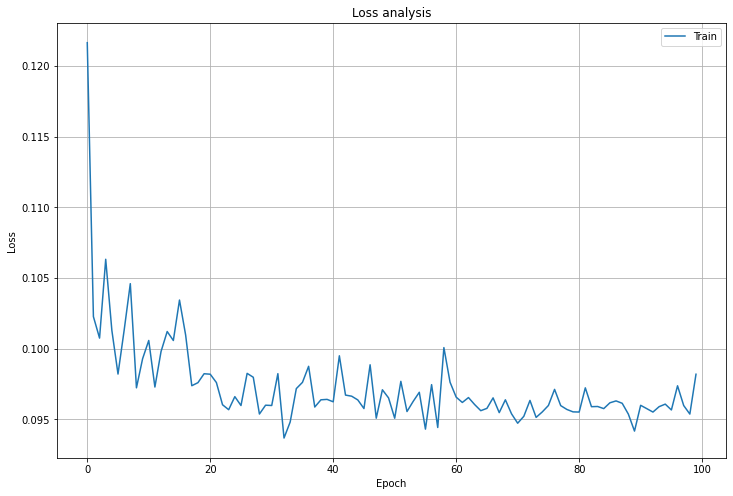

In [262]:
plt.figure(figsize = (12, 8))
plt.plot(history.history["loss"], label = "Training loss")
plt.title("Loss analysis")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train"])
plt.grid("both") 

In [263]:
model_json = model.to_json()
with open("arun_model_01.json", "w") as json_file:
  json_file.write(model_json)

model.save_weights("arun_model_01.h5")

**Test**

In [264]:
test.shape

(22, 6)

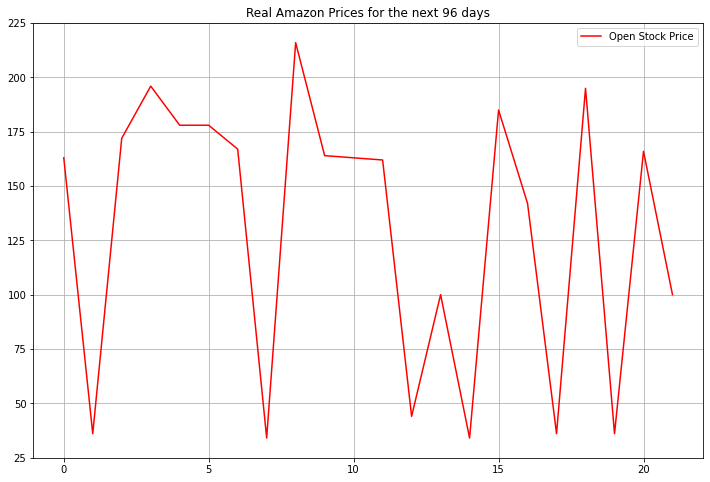

In [265]:
plt.figure(figsize = (12, 8))
plt.subplot(1,1,1)
plt.plot(test.Open.values, color = "red", label = "Open Stock Price")
plt.grid("both")
plt.title("Real Amazon Prices for the next 96 days")
plt.legend()

In [266]:
test.drop(["Vol","Date",  "High", "Low", "Close"], axis = 1, inplace = True)
train_pure.drop(["Vol","Date", "High", "Low", "Close"], axis = 1, inplace = True)

C:\Users\Biwas Kerung\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [268]:
train_pure.head()

,Open
45,36.0
233,167.0
447,144.0
159,87.0
313,197.0


In [269]:
real_prices = test.values

In [272]:
dataset_total = pd.concat((train_pure["Open"], test["Open"]), axis = 0)

In [273]:
inputs = dataset_total[len(dataset_total) - len(test) - time_step : ].values

In [274]:
inputs = inputs.reshape(-1, 1)

In [275]:
inputs = scaler.fit_transform(inputs)

In [276]:
inputs.shape

(62, 1)

In [277]:
x_test = []
for i in range(time_step, inputs.shape[0]):
  x_test.append(inputs[i - time_step : i , 0])
x_test = np.array(x_test)

In [278]:
x_test.shape

(22, 40)

In [279]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [280]:
predicted_prices = model.predict(x_test)

In [281]:
predicted_prices = scaler.inverse_transform(predicted_prices)

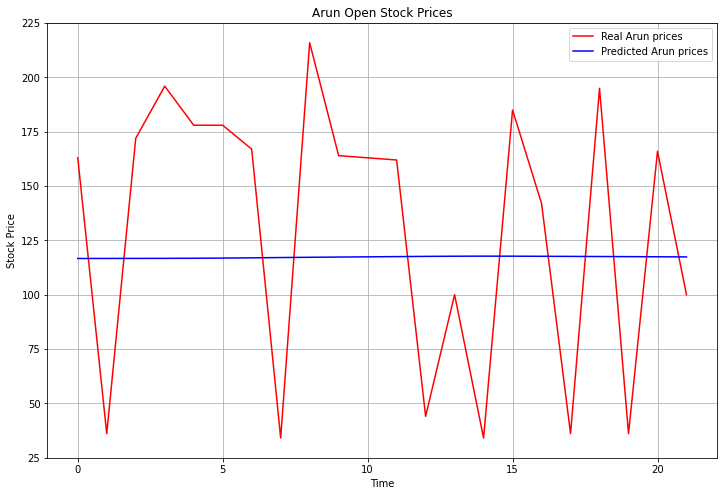

In [282]:
plt.figure(figsize= (12, 8))
plt.subplot(1,1,1)
plt.plot(real_prices, color = "red", label = "Real Arun prices")
plt.plot(predicted_prices, color = "blue", label = "Predicted Arun prices")
plt.title("Arun Open Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid("both")
plt.show()